## Reddit Post Natural Language Processing and Classification
![reddit](images/reddit_logo.png)
### 04. Sentiment Analysis

In [837]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import seaborn as sns

In [1097]:
posts_df = pd.read_csv('data/clean_posts.csv')
print (f'posts_df.shape: {posts_df.shape} ')
posts_df.head()

posts_df.shape: (17847, 8) 


,subreddit,selftext,title,author,created_utc,created_date,all_text,class
0,AskCulinary,"Hi everyone,\n\nI'm not sure if this is the pl...",Fridge for an instructional kitchen?,PrinceOfWales_,1610056955,2021-01-07 22:02:35,"Hi everyone, I'm not sure if this is the plac...",1
1,AskCulinary,"Hey, I was wondering if anybody had tips to ke...",How to keep sourdough starter jar clean?,frowogger,1610055394,2021-01-07 21:36:34,"Hey, I was wondering if anybody had tips to ke...",1
2,AskCulinary,\nI’m Gonna make birria tacos tomorrow and my ...,What substitutes can I use for guajillo chili’...,pelse_O_clock,1610055301,2021-01-07 21:35:01,I’m Gonna make birria tacos tomorrow and my g...,1
3,AskCulinary,"Hi all,\n\nI just found a steal on a WagnerWar...",Wagner Magnalite Dutch Oven,EmbryoRoux,1610055100,2021-01-07 21:31:40,"Hi all, I just found a steal on a WagnerWare ...",1
4,AskCulinary,"Hi all,\n\nI tried making Julia's recipe for P...",AWFUL SMELL Potage Parmentier/Vichyssoise,batcat03,1610054738,2021-01-07 21:25:38,"Hi all, I tried making Julia's recipe for Pot...",1


In the dataset of approximately 18,000 posts, around 190 posts contain the term **lone**<br>
This provides a guide for what we should expect to find as we perform the sentiment analysis.

In [1100]:
posts_df[posts_df['all_text'].str.contains('lone', regex=False)].shape

(189, 8)

---
Compare sentiment of text data in the **AskCulinary** posts to the **running** posts.<br>
Culinary posts are classified as 1, running posts as 0.

In [839]:
culinary_df = posts_df[posts_df['class'] == 1].copy()
culinary_df.head()

,subreddit,selftext,title,author,created_utc,created_date,all_text,class
0,AskCulinary,"Hi everyone,\n\nI'm not sure if this is the pl...",Fridge for an instructional kitchen?,PrinceOfWales_,1610056955,2021-01-07 22:02:35,"Hi everyone, I'm not sure if this is the plac...",1
1,AskCulinary,"Hey, I was wondering if anybody had tips to ke...",How to keep sourdough starter jar clean?,frowogger,1610055394,2021-01-07 21:36:34,"Hey, I was wondering if anybody had tips to ke...",1
2,AskCulinary,\nI’m Gonna make birria tacos tomorrow and my ...,What substitutes can I use for guajillo chili’...,pelse_O_clock,1610055301,2021-01-07 21:35:01,I’m Gonna make birria tacos tomorrow and my g...,1
3,AskCulinary,"Hi all,\n\nI just found a steal on a WagnerWar...",Wagner Magnalite Dutch Oven,EmbryoRoux,1610055100,2021-01-07 21:31:40,"Hi all, I just found a steal on a WagnerWare ...",1
4,AskCulinary,"Hi all,\n\nI tried making Julia's recipe for P...",AWFUL SMELL Potage Parmentier/Vichyssoise,batcat03,1610054738,2021-01-07 21:25:38,"Hi all, I tried making Julia's recipe for Pot...",1


In [841]:
running_df = posts_df[posts_df['class'] == 0].copy()
running_df.reset_index(inplace=True)
running_df.head()

,index,subreddit,selftext,title,author,created_utc,created_date,all_text,class
0,9766,running,"I""m just getting into running. TBQH a lot of t...",Do you try to beat your personal record everyt...,theRealLOCURO,1610054995,2021-01-07 21:29:55,"I""m just getting into running. TBQH a lot of t...",0
1,9767,running,One day I hope to run a sub 3 marathon. I know...,Training advice?,lilteezybaby117,1610054062,2021-01-07 21:14:22,One day I hope to run a sub marathon. I know...,0
2,9768,running,"Hi,\n\nI wear size 45 (EU Size) for my Convers...",What size should running shoes be?,Emil_1996,1610053837,2021-01-07 21:10:37,"Hi, I wear size (EU Size) for my Converse A...",0
3,9769,running,Got myself a little (not so little) running pa...,running buddy,nofeeit,1610053330,2021-01-07 21:02:10,Got myself a little (not so little) running pa...,0
4,9770,running,This is my highest number yet! I was a solid s...,Yo I ran 24.2 miles yesterday,surfsteph,1610052424,2021-01-07 20:47:04,This is my highest number yet! I was a solid s...,0


### Examine the VADER Sentiment Library
This lexicon is used by a Sentiment Intensity Analyzer instance to produce a sentiment score on a text string.

Import all tokens in the VADER.  Will use to search for negative words later

In [843]:
vader_lexicon = pd.read_csv('data/vader_lexicon.txt', sep='\t', header=0, names=['token', 'mean_sentiment_rating', 'standard_deviation', 'raw_human_sentiment_ratings'])
vader_lexicon.iloc[4400:4415]

,token,mean_sentiment_rating,standard_deviation,raw_human_sentiment_ratings
4400,loathes,-1.9,1.13578,"[-1, -4, -1, -3, -3, -1, -1, -3, -1, -1]"
4401,loathing,-2.7,0.78102,"[-3, -3, -3, -1, -4, -2, -3, -3, -2, -3]"
4402,lobby,0.1,0.53852,"[0, 0, 0, 1, 0, 1, 0, -1, 0, 0]"
4403,lobbying,-0.3,0.45826,"[0, -1, 0, 0, 0, 0, 0, -1, -1, 0]"
4404,lol,1.8,1.46969,"[1, 3, 4, 1, 2, 4, 1, 2, -1, 1]"
4405,lone,-1.1,0.30000,"[-1, -1, -1, -1, -1, -1, -2, -1, -1, -1]"
4406,lonelier,-1.4,0.66332,"[-2, -1, -2, -2, 0, -2, -1, -1, -1, -2]"
4407,loneliest,-2.4,0.80000,"[-3, -1, -2, -4, -2, -2, -3, -3, -2, -2]"
4408,loneliness,-1.8,0.60000,"[-2, -2, -1, -3, -2, -2, -1, -2, -1, -2]"
4409,lonelinesses,-1.5,1.36015,"[-2, -2, -1, -1, 2, -1, -3, -2, -3, -2]"


In [844]:
print (f'There are {vader_lexicon.shape[0]} words in the VADER lexicon.' )

There are 7519 words in the VADER lexicon.


In [845]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

Use the SentimentIntensityAnalyzer to judge the sentiment of each reddit post.  After which we can compare the overall sentiment between the two reddit subcategories.

From the documentation :
https://github.com/cjhutto/vaderSentiment
* A score of –4 equates to Extremely Negative.
* A score of 4 equates to Extremely Positive

If a term is not present in the VADER lexicon, the Analyzer returns a neutral score.
The Analyzer returns scores that should always add up to a total of 1.

For example, the term **cooking** is not in the lexicon, and has a score indicating 100% neutral (*neu*: 1.0)

In [846]:
print (f'"cooking" sentiment: {sent.polarity_scores("cooking")} ')

"cooking" sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 


The term **running**, or **run** are not in the lexicon.

In [847]:
print (f'"running" sentiment: {sent.polarity_scores("running")} ')
print (f'"run" sentiment: {sent.polarity_scores("run")} ')

"running" sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 
"run" sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} 


From the [documentation](https://github.com/cjhutto/vaderSentiment):<br>
The **compound score** is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

The term **alone** has a slightly negative compund score.

In [848]:
print (f'"alone" sentiment: {sent.polarity_scores("alone")} ')

"alone" sentiment: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.25} 


Other terms similar to **lonely** have slightly negative compund scores.

In [849]:
print (f'"lonely" sentiment: {sent.polarity_scores("lonely")} ')
print (f'"loner" sentiment: {sent.polarity_scores("loner")} ')

"lonely" sentiment: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3612} 
"loner" sentiment: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182} 


The words **together** and **family** are not included in the lexicon, but the many variations of the word **friend** do appear.  These are expectedly positive.

In [850]:
sent.polarity_scores("I am with friends")

{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.4767}

In [851]:
sent.polarity_scores("I am with friends running")

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4767}

---
Loop through every Ask Culinary reddit post, and find the VADER sentiment scores for the contents of all_text (which is simply the title combined with the selftext

In [852]:
culinary_df['neg'] = [sent.polarity_scores(post)['neg'] for post in culinary_df['all_text']]
culinary_df['neu'] = [sent.polarity_scores(post)['neu'] for post in culinary_df['all_text']]
culinary_df['pos'] = [sent.polarity_scores(post)['pos'] for post in culinary_df['all_text']]
culinary_df['compound'] = [sent.polarity_scores(post)['compound'] for post in culinary_df['all_text']]
culinary_df.head(3)

,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
0,AskCulinary,"Hi everyone,\n\nI'm not sure if this is the pl...",Fridge for an instructional kitchen?,PrinceOfWales_,1610056955,2021-01-07 22:02:35,"Hi everyone, I'm not sure if this is the plac...",1,0.014,0.916,0.069,0.7663
1,AskCulinary,"Hey, I was wondering if anybody had tips to ke...",How to keep sourdough starter jar clean?,frowogger,1610055394,2021-01-07 21:36:34,"Hey, I was wondering if anybody had tips to ke...",1,0.044,0.829,0.127,0.9332
2,AskCulinary,\nI’m Gonna make birria tacos tomorrow and my ...,What substitutes can I use for guajillo chili’...,pelse_O_clock,1610055301,2021-01-07 21:35:01,I’m Gonna make birria tacos tomorrow and my g...,1,0.000,0.953,0.047,0.3612


In [913]:
# print(f'Average of culinary scores {round(culinary_df["neg"].mean(), 4)*100 }% negative \n')
# print(f'Average of culinary scores { culinary_df["neu"].mean()*100:{4}.{4}}% neutral \n')
# print(f'Average of culinary scores {round(culinary_df["pos"].mean(), 4)*100 }% positive\n')
# print(f'Average of culinary compound scores {round(culinary_df["compound"].mean(), 4)*100 }% \n')

# Help with the f string formatting (since round was giving me long floating numbers):
#https://docs.python.org/3/reference/lexical_analysis.html#f-strings

data = { 'Negative': culinary_df["neg"].mean(),
        'Neutral': culinary_df["neu"].mean(),
        'Positive': culinary_df["pos"].mean(),
        'Compound' : culinary_df["compound"].mean()}

df_scores = pd.DataFrame(data, index=['Ask Culinary'])
df_scores.head()


,Negative,Neutral,Positive,Compound
Ask Culinary,0.041164,0.854365,0.104473,0.40366


---
Loop through every running reddit post, and find the VADER sentiment scores for the contents of all_text (which is simply the title combined with the selftext)

In [854]:
running_df['neg'] = [sent.polarity_scores(post)['neg'] for post in running_df['all_text']]
running_df['neu'] = [sent.polarity_scores(post)['neu'] for post in running_df['all_text']]
running_df['pos'] = [sent.polarity_scores(post)['pos'] for post in running_df['all_text']]
running_df['compound'] = [sent.polarity_scores(post)['compound'] for post in running_df['all_text']]
running_df.head(3)

,index,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
0,9766,running,"I""m just getting into running. TBQH a lot of t...",Do you try to beat your personal record everyt...,theRealLOCURO,1610054995,2021-01-07 21:29:55,"I""m just getting into running. TBQH a lot of t...",0,0.040,0.884,0.076,0.6134
1,9767,running,One day I hope to run a sub 3 marathon. I know...,Training advice?,lilteezybaby117,1610054062,2021-01-07 21:14:22,One day I hope to run a sub marathon. I know...,0,0.032,0.838,0.130,0.9696
2,9768,running,"Hi,\n\nI wear size 45 (EU Size) for my Convers...",What size should running shoes be?,Emil_1996,1610053837,2021-01-07 21:10:37,"Hi, I wear size (EU Size) for my Converse A...",0,0.037,0.771,0.192,0.9050


In [914]:
# print(f'Average of running scores {round(running_df["neg"].mean(), 4)*100 }% negative \n')
# print(f'Average of running scores { running_df["neu"].mean()*100:{4}.{4}}% neutral \n')
# print(f'Average of running scores {round(running_df["pos"].mean(), 4)*100 }% positive\n')
# print(f'Average of running compound scores {round(running_df["compound"].mean(), 4)*100 }% \n')

# This tip was helpful in adding the new row of running data
#https://pythonexamples.org/pandas-dataframe-add-append-row/
    
df_scores.loc['running'] = [running_df["neg"].mean(),
                            running_df["neu"].mean(),
                            running_df["pos"].mean(),
                            running_df["compound"].mean()
                           ]

df_scores.head()

,Negative,Neutral,Positive,Compound
Ask Culinary,0.041164,0.854365,0.104473,0.403660
running,0.062230,0.816841,0.120933,0.378753


The Ask Culinary average compound sentiment score for it's posts was higher (40.37%) than the running posts, which had a compound sentiment score of 37.88%.
This implies on average the Ask Culinary posts were more positive.

In [916]:
scores_t df_scores.T

,Ask Culinary,running
Negative,0.041164,0.062230
Neutral,0.854365,0.816841
Positive,0.104473,0.120933
Compound,0.403660,0.378753


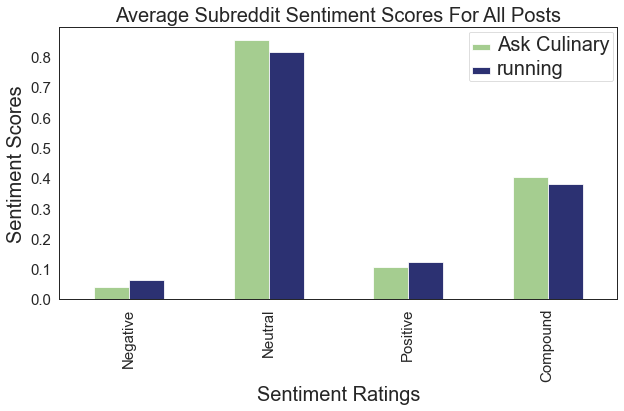

In [1103]:
ax = df_scores.T.plot(kind='bar', cmap="crest", figsize=(10,5));

ax.set_title("Average Subreddit Sentiment Scores For All Posts",fontsize=20)
ax.set_xlabel("Sentiment Ratings",fontsize=20)
ax.set_ylabel("Sentiment Scores",fontsize=20)
ax.tick_params(labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')

sns.set_style("white")
ax.grid(False)

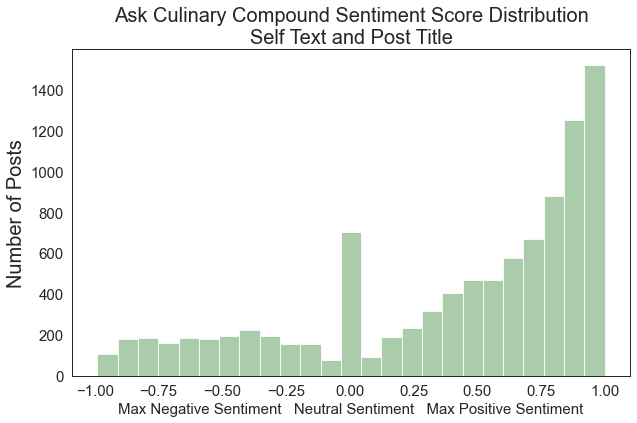

In [1109]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plt.xlabel('-1 Max Negative Sentiment 0 Neutral Sentiment   +1 Max Positive Sentiment')
# plt.ylabel('Number of Posts')
# plt.title("Ask Culinary Compound Sentiment Score Distribution\nSelf Text and Post Title")

ax = sns.histplot(x='compound', data=culinary_df, ax=ax, color='darkseagreen')

ax.set_title("Ask Culinary Compound Sentiment Score Distribution\nSelf Text and Post Title",fontsize=20)
ax.set_xlabel("Max Negative Sentiment   Neutral Sentiment   Max Positive Sentiment",fontsize=15)
ax.set_ylabel("Number of Posts",fontsize=20)
ax.tick_params(labelsize=15)


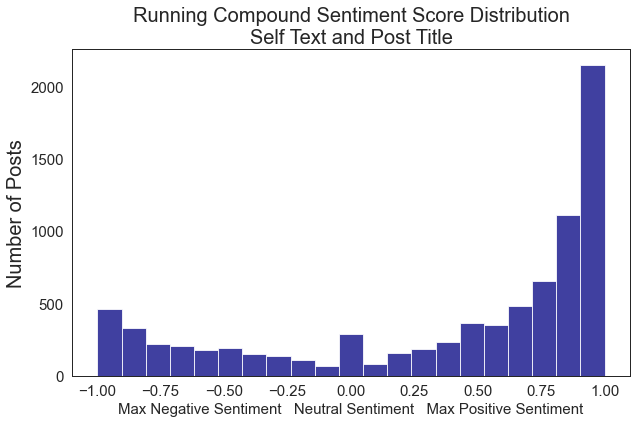

In [1110]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.histplot(x='compound', data=running_df, ax=ax, color='navy')

ax.set_title("Running Compound Sentiment Score Distribution\nSelf Text and Post Title",fontsize=20)
ax.set_xlabel("Max Negative Sentiment   Neutral Sentiment   Max Positive Sentiment",fontsize=15)
ax.set_ylabel("Number of Posts",fontsize=20)
ax.tick_params(labelsize=15)

The running posts actually did have more posts with a positive score, but the higher number of negative posts brought the total score lower than the Ask Culinary posts.

#### Create Word Vectorizer to analyze 16_000 posts and compare overall negativity (i.e. negative sentiment scores).

Use sklearn's default collection of English stop words as a starting point, but add a few terms that would not be useful.

Add stop words that might be measurements for recipes, and distance for running (km).

The terms **run** and **running** were very common, as one would expect, in the running posts, so add to the list of stop words.

From 02.EDA, the terms **like** and **just** were the two most popular terms, but do not add value, so also add to the list of stop words.

In [858]:
# hat tip to for adding custom stop words : https://stackoverflow.com/a/24386751/732396

# after sorting through a lot of highly negative words, the term 'fu' came up, so will add to the list of stop words.
more_stop_words = ['oz', 'cups', 'km', 'run', 'running', 'like','just','fu']
stop_words_list = text.ENGLISH_STOP_WORDS.union(more_stop_words)

In [859]:
print (f'There are {len(text.ENGLISH_STOP_WORDS)} words in sklearn\'s default stop word file.')

There are 318 words in sklearn's default stop word file.


In [860]:
sorted(stop_words_list)[0:13]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already']

The word **'alone'** is in the default stop words file, but this is something I am trying to research for my problem statement. So remove it from the list of stop_words.

The sklearn ENGLISH_STOP_WORDS is a frozenset, so a value can not be easily removed.<br>
Instead, make a copy into a new list, then remove the word 'alone'.

In [861]:
unfrozen_stop_words = [word for word in stop_words_list]
unfrozen_stop_words.remove('alone')

In [862]:
print(f'After adjustments, there are now {len(unfrozen_stop_words)} stop words the CountVectorizer will not include.')

After adjustments, there are now 325 stop words the CountVectorizer will not include.


Analyze the sentiment of the stop word list:

In [1095]:
stop_word_sentence = ' '.join([word for word in text.ENGLISH_STOP_WORDS])
#stop_word_sentence

In [864]:
sent.polarity_scores(stop_word_sentence)

{'neg': 0.042, 'neu': 0.908, 'pos': 0.05, 'compound': 0.3625}

If all 325 default stop words are put into a sentence, it has a slightly positive sentiment. 

Excluding these words could have an effect on the compound scores of the reddit posts.

In [866]:
culinary_df.shape

(9766, 12)

In [867]:
# First idea was just take the most 300 posts, but later decided to go with 8_000 for each
culinary_neg_posts = culinary_df.sort_values(by='compound')[0:8000]
#culinary_neg_posts = culinary_df.sort_values(by='compound')
culinary_neg_posts.tail(3)

,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
5882,AskCulinary,im looking for a place that pays better and ha...,I work at a Midwestern USA gas station/pizza p...,geopjm10,1602041695,2020-10-07 03:34:55,im looking for a place that pays better and ha...,1,0.000,0.706,0.294,0.9062
2337,AskCulinary,I want to make some cakesicles for my kids fri...,What tempered chocolate is best to use to make...,lolalaughed,1607388315,2020-12-08 00:45:15,I want to make some cakesicles for my kids fri...,1,0.029,0.721,0.250,0.9062
5213,AskCulinary,"I’ve been making lot of pizza recently, but fr...",How to add ‘sourness’ to pizza?,lexpi,1603085866,2020-10-19 05:37:46,"I have been making lot of pizza recently, but ...",1,0.000,0.865,0.135,0.9062


In [868]:
lone_culinary_df = culinary_neg_posts[culinary_neg_posts['all_text'].str.contains('lone', regex=False)]
lone_culinary_df.iloc[0]['all_text']

'Hi I just failed my first try to make poached eggs and I do not know where it went wrong.      So I brought the water to boil and then I decreased the temperature and waited until the water wasn’t boing but only had like tiny bubbles I gave the water a twirl and put in (from a cup) the egg. But instead of the egg white wrapping itself around the yolk, the two just got separated and I got bits of egg white swimming in the pot  and the yolk swimming in the water all alone.        Where might it have gone wrong? The only things I could think of that maybe the water was too cold/hot or that I haven’t used a fresh egg as recommended. Just failed my first try to make poached eggs. Egg white just got seperated from the yolk. Where might it have gone wrong?'

#### Create CountVectorizer

In [869]:
# use the new set of stop words (which does NOT include 'alone')
count_vec_culinary_neg = CountVectorizer(stop_words = unfrozen_stop_words)
count_vec_culinary_neg.fit(culinary_neg_posts['all_text'])

cul_neg_posts_matrix = count_vec_culinary_neg.transform(culinary_neg_posts['all_text'])

# Code borrowed from lesson 5.04
# convert training data to dataframe
culinary_neg_words_df = pd.DataFrame(cul_neg_posts_matrix.todense(), columns = count_vec_culinary_neg.get_feature_names())

culinary_neg_words_df.head(3)

,aa,aahu,aaron,abdomen,abiding,ability,abit,able,abnb,abnormal,...,ひだまりクッキング,五香粉,北京烤鴨,半筋半肉,牛腩,牛腱子,花椒,草果,갈비찜,진간장
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [870]:
print (f'There are {vader_lexicon.shape[0]} words in the VADER lexicon.' )
print (f'Try to find a match of the {culinary_neg_words_df.shape[1]} words found in the Ask Culinary posts.' )

There are 7519 words in the VADER lexicon.
Try to find a match of the 16270 words found in the Ask Culinary posts.


Per lesson 5.04, summing the count vector dataframe creates a Series of word counts.  Its index contains the words themselves:

In [871]:
culinary_neg_words_df.sum().sort_values(ascending=False)

make            2960
use             2336
recipe          2021
chicken         1691
does            1567
                ... 
maraschino         1
manwich            1
manufactures       1
manufactors        1
aa                 1
Length: 16270, dtype: int64

In [872]:
#Started with the idea of just getting the most common 500 words, but instead just get all words in the reddit posts.

common_cul_neg_words = culinary_neg_words_df.sum().sort_values(ascending=False)
common_cul_neg_words.index

Index(['make', 'use', 'recipe', 'chicken', 'does', 'time', 'cooking', 'know',
       'making', 'cook',
       ...
       'margarhita', 'marcato', 'mantecare', 'maraville', 'marathon',
       'maraschino', 'manwich', 'manufactures', 'manufactors', 'aa'],
      dtype='object', length=16270)

For each word in the subreddit posts, try to see if a sentiment value exists. If not a word is considered neutral.

In [873]:
found_cul_neg_words = pd.DataFrame([ word for word in list(common_cul_neg_words.index) if word in list(vader_lexicon['token'])] , columns =['word']) 
print (f'Found {found_cul_neg_words.shape[0]} Ask Culinary words in the VADER lexicon.')
found_cul_neg_words.head()

Found 1510 Ask Culinary words in the VADER lexicon.


,word
0,want
1,good
2,help
3,thanks
4,sure


If a word is found in the VADER lexicon, add its average rating (-4 for most negative, +4 for most positive)

In [874]:
found_cul_neg_words['rating'] = [vader_lexicon[vader_lexicon['token'] == word]['mean_sentiment_rating'].values[0] for word in found_cul_neg_words['word']]

# Sorting the words by most negative words in the lexicon displays some truly horrible words, so will not print out here.
#found_cul_neg_words.sort_values(by='rating', inplace=True, ignore_index=True)

found_cul_neg_words.head()

,word,rating
0,want,0.3
1,good,1.9
2,help,1.7
3,thanks,1.9
4,sure,1.3


In [875]:
print (f'Of the {found_cul_neg_words.shape[0]} words founds with a sentiment rating, {sum(found_cul_neg_words["rating"]<0)} had a negative rating.' )

Of the 1510 words founds with a sentiment rating, 852 had a negative rating.


In [994]:
lonely_cul_words = found_cul_neg_words[found_cul_neg_words['word'].str.contains('lone', regex=False)].copy()
lonely_cul_words['count'] = [common_cul_neg_words [word] for word in lonely_cul_words['word']]
lonely_cul_words.set_index('word', inplace=True)
lonely_cul_words

,rating,count
word,,
alone,-1.0,40
lonely,-1.5,2


The word **alone** was found in the Ask Culinary subreddit posts 40 times.  The word **lonely** was found two times.

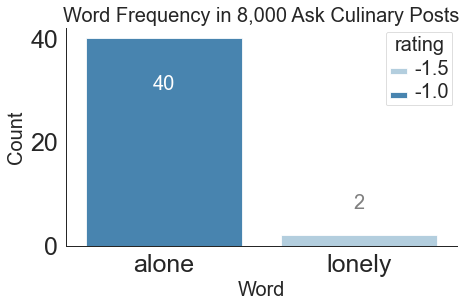

In [1101]:
plt.figure(figsize=(7,4))

ax = sns.barplot(y ='count', hue = 'rating', x = lonely_cul_words.index, data = lonely_cul_words,
            palette = 'Blues', edgecolor = 'w', dodge=False)

ax.set_title("Word Frequency in 8,000 Ask Culinary Posts",fontsize=20)
ax.set_xlabel("Word",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=25)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')

ax.text(0,30, '40', ha='center', fontsize=20, color='white')
ax.text(1,7, '2', ha='center', fontsize=20, color='gray')

sns.despine()

plt.show()

Repeat all steps to find negative words in most negative running posts

In [877]:
running_df.shape

(8081, 13)

In [878]:
# First idea was just take the most 300 posts, but later decided to go with 8_000 for each
running_neg_posts = running_df.sort_values(by='compound')[0:8000]
running_neg_posts.tail(3)

,index,subreddit,selftext,title,author,created_utc,created_date,all_text,class,neg,neu,pos,compound
2024,11790,running,I've been running since August. Smaller distan...,Impromptu Half Marathon (my 1st),pako1337,1607930409,2020-12-14 07:20:09,I have been running since August. Smaller dist...,0,0.058,0.736,0.206,0.9965
7612,17378,running,"Good morning runners,\n\nToday I set out for a...",Alternate ways to check your progress (not che...,Musef,1601901059,2020-10-05 12:30:59,"Good morning runners, Today I set out for a ...",0,0.005,0.754,0.241,0.9965
4605,14371,running,Lots of posts be like .. i ran 2 miles without...,"Runners need to stop saying they're ""bad"" at r...",miii13,1605050194,2020-11-10 23:16:34,Lots of posts be like .. i ran miles without...,0,0.022,0.699,0.279,0.9965


In [879]:
running_neg_posts[running_neg_posts['all_text'].str.contains('lone', regex=False)].shape

(116, 13)

#### Create CountVectorizer

In [880]:
# use the new set of stop words (which does NOT include 'alone')
count_vec_running_neg = CountVectorizer(stop_words = unfrozen_stop_words)

count_vec_running_neg.fit(running_neg_posts['all_text'])

run_neg_posts_matrix = count_vec_running_neg.transform(running_neg_posts['all_text'])

running_neg_words_df = pd.DataFrame(run_neg_posts_matrix.todense(), columns = count_vec_running_neg.get_feature_names())

running_neg_words_df.head(3)

,aa,aaand,ab,ababel,aback,abandon,abandoned,abandoning,abb,abc,...,zoomx,zr,zwift,zyrtec,élévation,œil,και,καλημέρα,καλό,μήνα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [881]:
print (f'There are {vader_lexicon.shape[0]} words in the VADER lexicon.' )
print (f'Try to find a match of the {running_neg_words_df.shape[1]} words found in the running posts.' )

There are 7519 words in the VADER lexicon.
Try to find a match of the 17963 words found in the running posts.


Per lesson 5.04, summing the count vector dataframe creates a Series of word counts.  Its index contains the words themselves:

In [882]:
running_neg_words_df.sum().sort_values(ascending=False)

time         4076
week         3270
miles        2876
training     2612
really       2537
             ... 
roadblock       1
fuvking         1
rivs            1
fz              1
μήνα            1
Length: 17963, dtype: int64

In [883]:
#Started with the idea of just getting the most common 500 words, but instead just get all words in the reddit posts.

common_run_neg_words = running_neg_words_df.sum().sort_values(ascending=False)
common_run_neg_words.index

Index(['time', 'week', 'miles', 'training', 'really', 'mile', 'started',
       'runs', 'marathon', 'day',
       ...
       'fussy', 'fusterated', 'futbol', 'roadhawk', 'futility', 'roadblock',
       'fuvking', 'rivs', 'fz', 'μήνα'],
      dtype='object', length=17963)

For each word in the subreddit posts, try to see if a sentiment value exists. If not a word is considered neutral.

In [884]:
found_run_neg_words = pd.DataFrame([ word for word in list(common_run_neg_words.index) if word in list(vader_lexicon['token'])] , columns =['word']) 
print (f'Found {found_run_neg_words.shape[0]} running words in the VADER lexicon.')
found_run_neg_words.head()

Found 2096 running words in the VADER lexicon.


,word
0,pain
1,good
2,want
3,help
4,thanks


If a word is found in the VADER lexicon, add its average rating (-4 for most negative, +4 for most positive)

In [885]:
found_run_neg_words['rating'] = [vader_lexicon[vader_lexicon['token'] == word]['mean_sentiment_rating'].values[0] for word in found_run_neg_words['word']]

# Sorting the words by most negative words in the lexicon displays some truly horrible words, so will not print out here.
#found_run_neg_words.sort_values(by='rating', inplace=True, ignore_index=True)

found_run_neg_words.head()

,word,rating
0,pain,-2.3
1,good,1.9
2,want,0.3
3,help,1.7
4,thanks,1.9


In [886]:
print (f'Of the {found_run_neg_words.shape[0]} words founds with a sentiment rating, {sum(found_run_neg_words["rating"]<0)} had a negative rating.' )

Of the 2096 words founds with a sentiment rating, 1164 had a negative rating.


In [993]:
lonely_run_words = found_run_neg_words[found_run_neg_words['word'].str.contains('lone', regex=False)].copy()
lonely_run_words['count'] = [common_run_neg_words [word] for word in lonely_run_words['word']]
lonely_run_words.set_index('word', inplace=True)
lonely_run_words.head()

,rating,count
word,,
alone,-1.0,125
lonely,-1.5,8
lone,-1.1,7
lonelier,-1.4,1
loneliness,-1.8,1


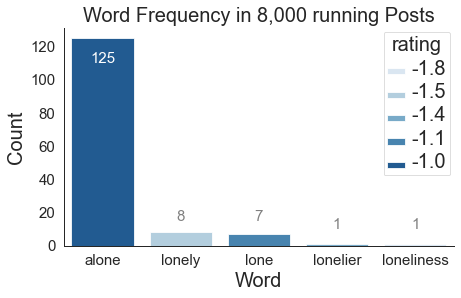

In [1094]:
plt.figure(figsize=(7,4))

ax = sns.barplot(y ='count', hue = 'rating', x = lonely_run_words.index, data = lonely_run_words,
            palette = 'Blues', edgecolor = 'w', dodge=False)

ax.set_title("Word Frequency in 8,000 running Posts",fontsize=20)
ax.set_xlabel("Word",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')

ax.text(0,110, '125', ha='center', fontsize=15, color='white')
ax.text(1,15, '8', ha='center', fontsize=15, color='gray')
ax.text(2,15, '7', ha='center', fontsize=15, color='gray')
ax.text(3,10, '1', ha='center', fontsize=15, color='gray')
ax.text(4,10, '1', ha='center', fontsize=15, color='gray')

sns.despine()

plt.show()




---
Ratio of negative words found in the 8_000 running posts, compared to the total number of words in those 8_000 posts.

This only includes the negative identified by a match in the VADER lexicon.

In [888]:
# Number of negative words / number of columns in running word vector
print (f'The percentage of negative words used in the running subreddit is \
{ round( (sum(found_run_neg_words["rating"]<0)) / running_neg_words_df.shape[1] * 100 , 2) }% ')

The percentage of negative words used in the running subreddit is 6.48% 


Compare this to the percentage of negative words found in the Ask Culinary subreddit posts.

In [889]:
# Number of negative words / number of columns in running word vector
print (f'The percentage of negative words used in the running subreddit is \
{ round( (sum(found_cul_neg_words["rating"]<0)) / culinary_neg_words_df.shape[1] * 100 , 2) }% ')

The percentage of negative words used in the running subreddit is 5.24% 


Both data sets contain 8_000 reddit posts, so this shows us that the running subreddits have a higher number of negative words in their text. 